# A Guide On Solving Non-Convex Consumption-Saving Models - 2D

This notebook produces the timing and accuracy results for the *extended* benchmark model *with two durable stocks* in [A Guide to Solve Non-Convex Consumption-Saving Models](https://drive.google.com/open?id=1V15dwMIrl_TJGoqu7qauhVWcDm0yqb-D).

# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

In [2]:
import time
import itertools as it
import numpy as np
from copy import copy

%matplotlib inline

# reload module each time cell is run
%load_ext autoreload
%autoreload 2

# load the DurableConsumptionModel module
from DurableConsumptionModel import DurableConsumptionModelClass

# Timing function

In [3]:
def run(name = 'baseline',
        load = False,
        solmethod = 'nvfi_cpp_2d',
        updpar = {},
        do_print = False):
    
    # a. create model
    model = DurableConsumptionModelClass(name=name,load=load,solmethod=solmethod,
                                         do_print=do_print,**updpar)

    # b. run
    if load == False:
              
        # i. solve
        model.solve()        
        
        total_time = np.sum(model.par.time_w+model.par.time_keep+model.par.time_adj)
        print(f'total time = {total_time:.2f}')
                
        # ii. simulate
        model.simulate(do_euler_error=True,do_utility=True)
    
        # iii. save
        model.save()

    # c. print progress
    print('')    
    model.print_analysis()        
    model.checksum(simple=True)
    print('')
    
    return model

# Settings

In [4]:
load = False
load_negm_cpp_2d = load
load_nvfi_cpp_2d = load
load_vfi_cpp_2d = load

T = 50
models = dict()

# baseline
basename = 'results'
base = dict()
base['do_2d'] = True
base['n_max'] = 2.0
base['Np'] = 50
base['Nn'] = 50
base['Nm'] = 100
base['Nx'] = 100
base['Na'] = 100
base['T'] = T

# Timings

In [5]:
models['negm_2d_cpp'] = run(name=f'{basename}',load=load_negm_cpp_2d,solmethod='negm_2d_cpp',updpar=base)
models['nvfi_2d_cpp'] = run(name=f'{basename}',load=load_nvfi_cpp_2d,solmethod='nvfi_2d_cpp',updpar=base)
models['vfi_2d_cpp'] = run(name=f'{basename}',load=load_vfi_cpp_2d,solmethod='vfi_2d_cpp',updpar=base)

total time = 377.84

Name: results (solmethod = negm_2d_cpp)
Grids: (p,n,m,x,a) = (50,50,100,100,100)
Timings:
 total: 377.8
     w: 313.9
  keep: 50.6
   adj: 13.4
Utility: -34.294884
Euler errors:
     total: -3.58 (-4.73,-2.36)
   keepers: -3.48 (-4.60,-2.35)
 adjusters: -3.82 (-4.94,-2.78)
      both: -1.27 (-1.41,-1.01)
        d1: -3.99 (-4.76,-3.25)
        d2: -3.91 (-4.60,-3.30)
Moments:
 adjuster share: 0.310
           both: 0.026
        only d1: 0.104
        only d2: 0.180
         mean c: 0.978
          var c: 0.254
         mean d1: 0.377
          var d1: 0.050
         mean d2: 0.214
          var d2: 0.018

checksum, inv_v_keep: 0.03983273
checksum, inv_v_adj_full: 0.03944954
checksum, inv_v_adj_d1_2d: 0.04047168
checksum, inv_v_adj_d2_2d: 0.04056766

total time = 837.39

Name: results (solmethod = nvfi_2d_cpp)
Grids: (p,n,m,x,a) = (50,50,100,100,100)
Timings:
 total: 837.4
     w: 199.0
  keep: 625.3
   adj: 13.1
Utility: -34.289404
Euler errors:
     total: -3.75 

# Tables

In [6]:
import tabs

In [7]:
main_models = [models['vfi_2d_cpp'],models['nvfi_2d_cpp'],models['negm_2d_cpp']]
tabs.all(main_models,speedup=True,postfix='_2d')

# Figures

In [8]:
from figs import lifecycle_compare

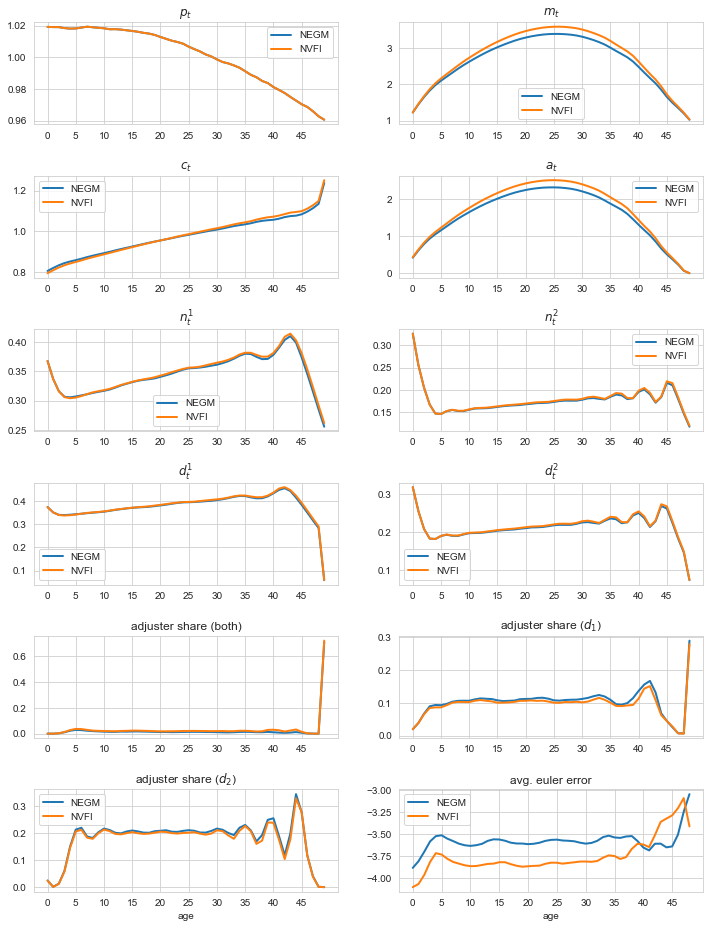

In [9]:
lifecycle_compare(models['negm_2d_cpp'],'NEGM',models['nvfi_2d_cpp'],'NVFI',do_euler_errors=True)

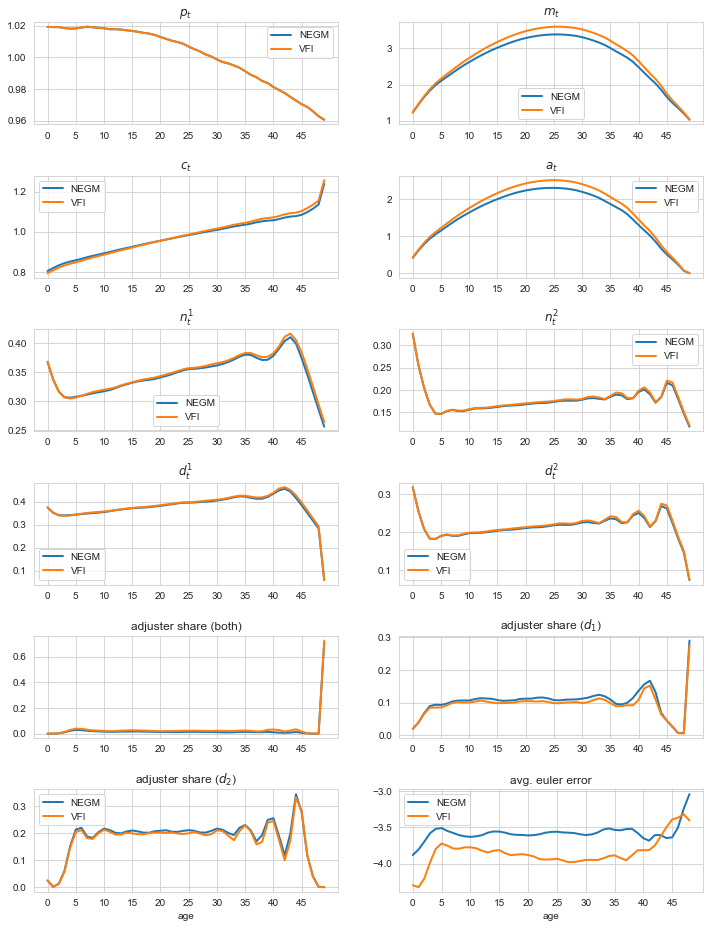

In [10]:
lifecycle_compare(models['negm_2d_cpp'],'NEGM',models['vfi_2d_cpp'],'VFI',do_euler_errors=True)